In [1]:
# Import libraries
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [2]:
# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lower case and tokenize

    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

# Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(lemmatized_tokens)

In [4]:
# Load dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke file dataset Anda
data_path = '/content/drive/MyDrive/UAS-NLP-Kelompok-01/model SVM/chatbot_data1.csv'

data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())

# Prepare the data for training
X = data['Pattern'].apply(preprocess_text)
y = data['Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mounted at /content/drive
     Tag Pattern                                  Response
0  salam     Hai                                   Hai :-)
1  salam     Hai       Halo, terima kasih sudah berkunjung
2  salam     Hai            Hai, ada yang bisa saya bantu?
3  salam     Hai  Halo, bagaimana saya bisa membantu Anda?
4  salam     Hai         Ada sesuatu yang bisa saya bantu.


In [5]:
# Create and train the model
model = make_pipeline(CountVectorizer(), SVC(kernel='linear'))
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('svc', SVC(kernel='linear'))])

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [7]:
# Save the model and vectorizer to files in .pkl format (joblib)
model_filename = '/content/drive/MyDrive/UAS-NLP-Kelompok-01/model SVM/model.pkl'

# Save the entire pipeline model (which includes the vectorizer)
joblib.dump(model, model_filename)

print(f'Model berhasil disimpan di {model_filename}')


Model berhasil disimpan di /content/drive/MyDrive/UAS-NLP-Kelompok-01/model SVM/model.pkl


In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Akurasi: 0.07
Laporan Klasifikasi:
                                                                                                                               precision    recall  f1-score   support

                                                                                            Ada sesuatu yang bisa saya bantu.       0.00      0.00      0.00         1
                                                                          Alamat kami di Jl. Laundry No.123, Jakarta Selatan.       0.00      0.00      0.00         0
                                                                              Anda bisa chat kami di WhatsApp 0812-3456-7890.       0.00      0.00      0.00         1
                                                                     Anda bisa membayar dengan Paytm, Google Pay, atau tunai.       0.00      0.00      0.00         1
                                                   Anda bisa mendapatkan layanan cuci biasa, cuci kering, serta dry cleaning.    

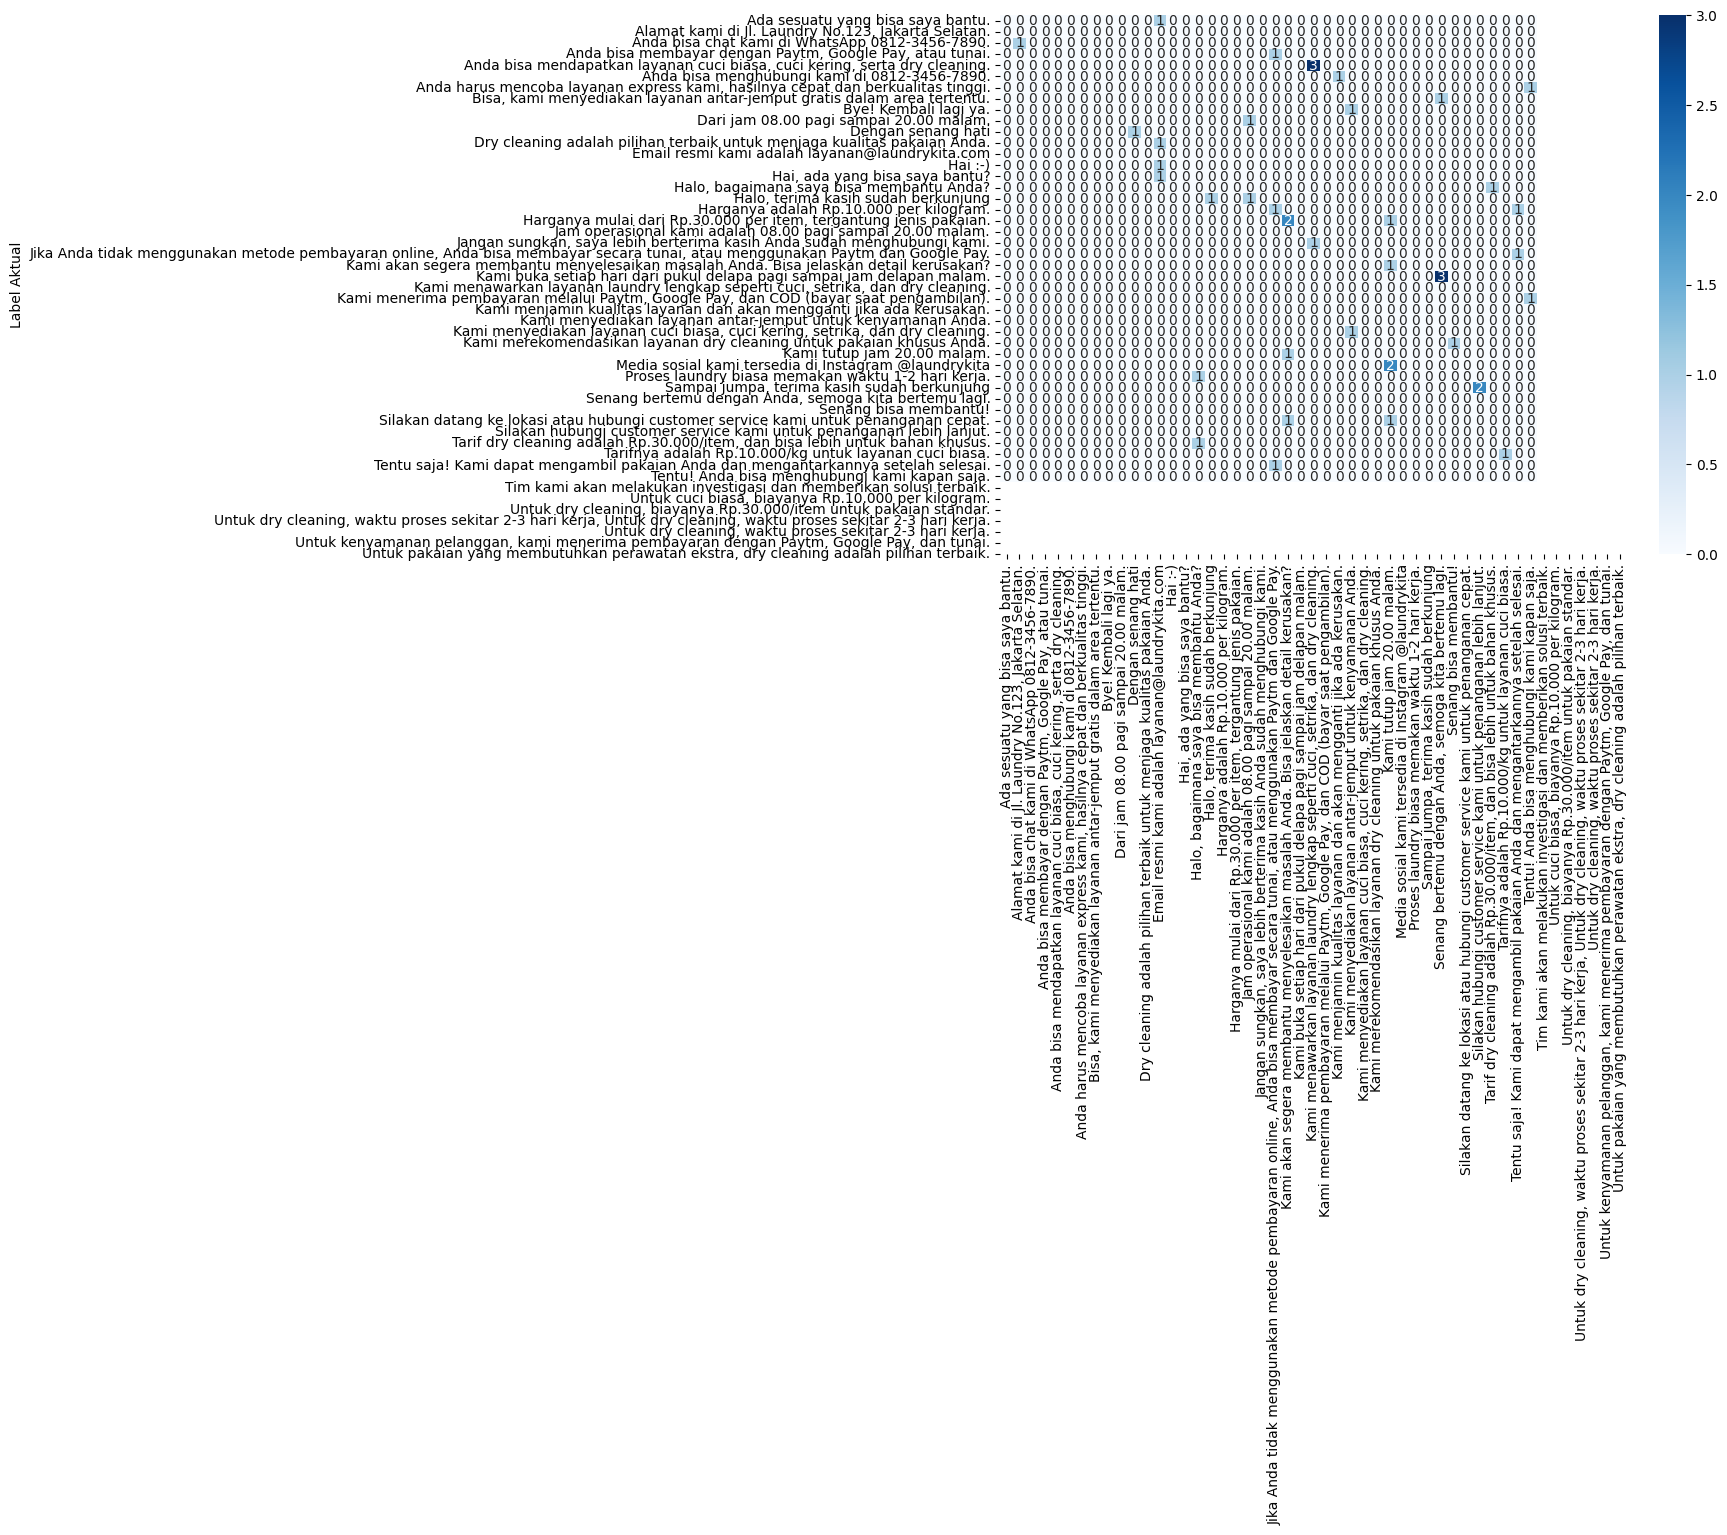

In [9]:
# Print evaluation results
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:')
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Label Aktual')
plt.show()

In [10]:
# Memuat model yang telah disimpan
loaded_model = joblib.load('/content/drive/MyDrive/UAS-NLP-Kelompok-01/model SVM/chatbot_model.pkl')

# Fungsi untuk menguji chatbot
def test_chatbot(user_input):
    prediction = loaded_model.predict([user_input])
    return prediction[0]

# Uji chatbot
print("Selamat datang di chatbot! Ketik 'quit' untuk keluar.")
while True:
    user_input = input("Anda: ")
    if user_input.lower() == "quit":
        print("Chatbot: Terima kasih! Sampai jumpa.")
        break

    try:
        response = test_chatbot(user_input)
        print("Chatbot:", response)
    except Exception as e:
        print("Chatbot: Maaf, saya tidak mengerti pertanyaan itu.")

Selamat datang di chatbot! Ketik 'quit' untuk keluar.
Anda: hai
Chatbot: Hai, ada yang bisa saya bantu?
Anda: quit
Chatbot: Terima kasih! Sampai jumpa.
